In [4]:
!pip install vaderSentiment


In [5]:
import io
import pandas as pd
import bs4
import urllib
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
import itertools
import collections
import networkx as nx
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from PIL import Image
import PIL.ImageOps
import random
from wordcloud import ImageColorGenerator

from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS

from gensim import corpora, models
import gensim

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [6]:
file_path = "/content/BNR COVID _stacked.txt"

# Open the file with error handling
with open(file_path, 'r', encoding='utf-8', errors='replace') as f:
    data = f.read()

print(data)


The peak of tensions generated by the COVID-19 crisis in the monetary, banking and financial field has been overcome. Whereas in the 11-20 March 2020 period, the cash withdrawals of credit institutions from the NBR for the purpose of meeting household and corporate demand reached a record high of lei 4.4 billion (twice as much as in December 2019, the winter holidays season), they have declined sharply over the past few days. The value of vault cash held by credit institutions has increased, meaning that they can now cover from own sources the cash requirements for making payments and smoothly feeding the ATMs.
The NBR�s cash reserve fund has remained within the prudential limits and has risen slightly during the past days. There are currently no bottlenecks in meeting cash demand in lei. The NBR recommends however that, in this period, companies and households should use cashless payment instruments to the largest extent possible. With regard to ensuring the cash requirements in forei

In [7]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords

# Now you can use the stopwords
stop_words = set(stopwords.words('english'))


In [9]:
stop_words = stopwords.words("english")
from nltk import bigrams

expression = "[^a-zA-Z0-9 ]"
cleantextCAP = re.sub(expression, '', data)
cleantext = cleantextCAP.lower() # lower case
print(cleantext)

the peak of tensions generated by the covid19 crisis in the monetary banking and financial field has been overcome whereas in the 1120 march 2020 period the cash withdrawals of credit institutions from the nbr for the purpose of meeting household and corporate demand reached a record high of lei 44 billion twice as much as in december 2019 the winter holidays season they have declined sharply over the past few days the value of vault cash held by credit institutions has increased meaning that they can now cover from own sources the cash requirements for making payments and smoothly feeding the atmsthe nbrs cash reserve fund has remained within the prudential limits and has risen slightly during the past days there are currently no bottlenecks in meeting cash demand in lei the nbr recommends however that in this period companies and households should use cashless payment instruments to the largest extent possible with regard to ensuring the cash requirements in foreign currency the disc

In [10]:
text_file = open("BNR COVID _stacked.txt", "w")
text_file.write(str(cleantext))
text_file.close()

dat = list(cleantext.split())
dict1 = {}
for i in range(len(dat)):
    word = dat[i]
    dict1[word] = dat.count(word)

keys = list(dict1)
filtered_words = [word for word in keys if word not in stopwords.words('english')]
dict2  = dict((k, dict1[k]) for k in filtered_words if k in filtered_words)

print (dict2)

{'peak': 1, 'tensions': 1, 'generated': 1, 'covid19': 2, 'crisis': 3, 'monetary': 4, 'banking': 4, 'financial': 6, 'field': 1, 'overcome': 1, 'whereas': 1, '1120': 1, 'march': 3, '2020': 4, 'period': 6, 'cash': 6, 'withdrawals': 1, 'credit': 4, 'institutions': 2, 'nbr': 11, 'purpose': 1, 'meeting': 3, 'household': 1, 'corporate': 1, 'demand': 3, 'reached': 1, 'record': 1, 'high': 3, 'lei': 5, '44': 1, 'billion': 4, 'twice': 1, 'much': 1, 'december': 1, '2019': 1, 'winter': 1, 'holidays': 1, 'season': 1, 'declined': 2, 'sharply': 1, 'past': 3, 'days': 4, 'value': 1, 'vault': 1, 'held': 1, 'increased': 1, 'meaning': 1, 'cover': 1, 'sources': 1, 'requirements': 2, 'making': 1, 'payments': 1, 'smoothly': 1, 'feeding': 1, 'atmsthe': 1, 'nbrs': 2, 'reserve': 1, 'fund': 1, 'remained': 3, 'within': 4, 'prudential': 1, 'limits': 2, 'risen': 1, 'slightly': 2, 'currently': 1, 'bottlenecks': 2, 'recommends': 1, 'however': 1, 'companies': 1, 'households': 3, 'use': 1, 'cashless': 1, 'payment': 2, '

In [11]:
# @title Default title text
def SequenceSelection(dictionary, length, startindex = 0):


    lengthDict = len(dictionary)
    if length > lengthDict:
        return print("length is longer than dictionary length");
    else:
        d = dictionary
        items = [(v, k) for k, v in d.items()]
        items.sort()
        items.reverse()
        itemsOut = [(k, v) for v, k in items]

        highest = itemsOut[startindex:startindex + length]
        dd = dict(highest)
        wanted_keys = dd.keys()
        dictshow = dict((k, d[k]) for k in wanted_keys if k in d)

        return dictshow;
dictshow = SequenceSelection(dictionary = dict2, length = 7, startindex = 0)

print(dictshow)



{'liquidity': 12, 'nbr': 11, 'financing': 10, 'rates': 9, 'public': 7, 'market': 7, 'interest': 7}


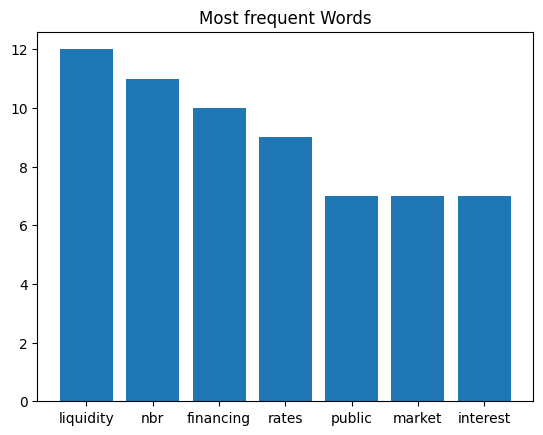

In [12]:
n = range(len(dictshow))
plt.bar(n, dictshow.values(), align='center')
plt.xticks(n, dictshow.keys())
plt.title("Most frequent Words")
plt.savefig("FrequentWords.png", transparent=True)

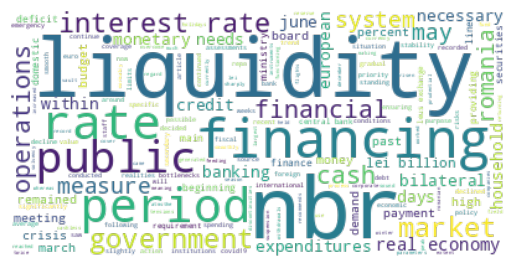

In [13]:
root_path = os.getcwd()
with open(path.join(root_path, 'BNR COVID _stacked.txt'), 'r', encoding='utf-8', errors='ignore') as outout_file:
    text = outout_file.readlines()



stopwords = set(STOPWORDS)
stopwords.add("said")


wc = WordCloud(max_words=1000,
               stopwords=stopwords, mode='RGBA', background_color=None)

wc.generate(text[0])

wc.to_file(path.join(root_path, "/content/Mugur.Isarescu.png"))

plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.show()

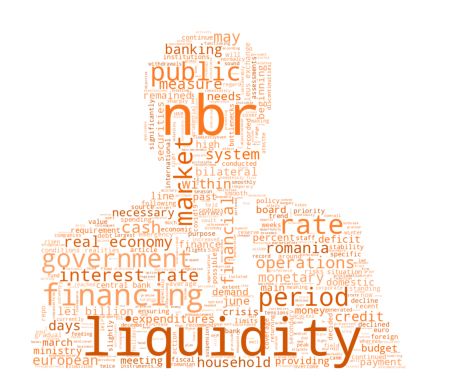

In [14]:

def orange_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(24, 99%%, %d%%)" % random.randint(40, 70)


mugur_isarescu = np.array(Image.open("Mugur.Isarescu.jpeg"))


wc = WordCloud(background_color="white",mask=mugur_isarescu,
               random_state=5,max_words=2000).generate(text[0])
plt.imshow(wc.recolor(color_func=orange_color_func, random_state=5))
plt.axis("off")
wc.to_file("Mugur.Isarescu.png")

In [15]:

from textblob import TextBlob
sentiment = TextBlob(cleantext)
print("Score", sentiment.sentiment.polarity)

Score 0.018598484848484854
